# Q) Delivery_time

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [ ]:
dataset=pd.read_csv("/content/delivery_time.csv")

In [ ]:
dataset.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [ ]:
dataset.columns

Index(['Delivery Time', 'Sorting Time'], dtype='object')

In [ ]:
dataset=dataset.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
dataset

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


<ipython-input-7-48cbded164f1>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['delivery_time'])


<Axes: xlabel='delivery_time', ylabel='Density'>

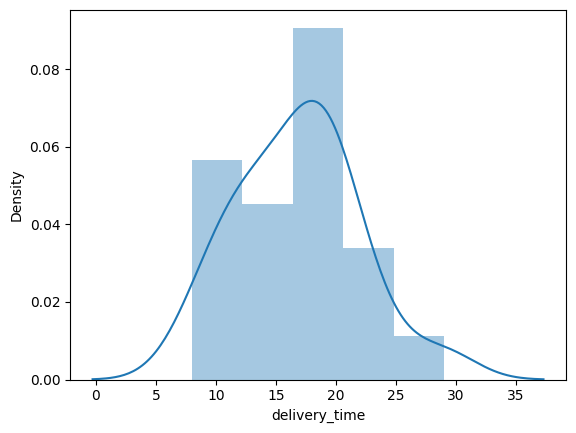

In [ ]:
sns.distplot(dataset['delivery_time'])

<ipython-input-8-707b786ba4e0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['sorting_time'])


<Axes: xlabel='sorting_time', ylabel='Density'>

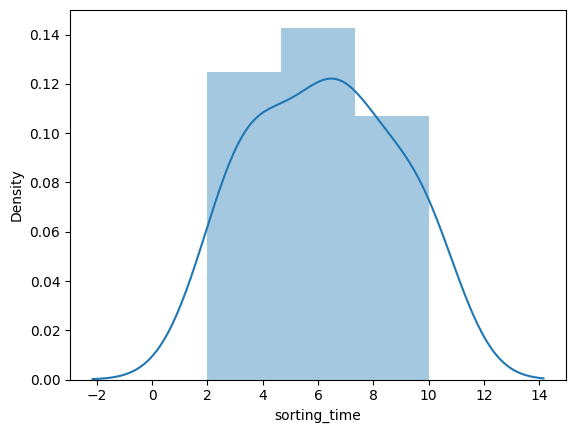

In [ ]:
sns.distplot(dataset['sorting_time'])

Independent and Dependent Variables

In [ ]:
x=dataset.iloc[:, 0].values
y=dataset.iloc[:, 1].values

In [ ]:
x

array([21.  , 13.5 , 19.75, 24.  , 29.  , 15.35, 19.  ,  9.5 , 17.9 ,
       18.75, 19.83, 10.75, 16.68, 11.5 , 12.03, 14.88, 13.75, 18.11,
        8.  , 17.83, 21.5 ])

In [ ]:
y

array([10,  4,  6,  9, 10,  6,  7,  3, 10,  9,  8,  4,  7,  3,  3,  4,  6,
        7,  2,  7,  5])

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [ ]:
x_train

array([19.83, 12.03,  8.  , 19.  , 17.83, 29.  , 19.75, 15.35, 13.75,
       18.75,  9.5 , 18.11, 24.  , 21.  , 14.88, 16.68])

In [ ]:
y_train

array([ 8,  3,  2,  7,  7, 10,  6,  6,  6,  9,  3,  7,  9, 10,  4,  7])

In [ ]:
x_test

array([17.9 , 11.5 , 21.5 , 13.5 , 10.75])

In [ ]:
y_test

array([10,  3,  5,  4,  4])

MACHINE LEARNING ALGORITHM

In [ ]:
dataset.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


In [ ]:
import statsmodels.formula.api as smf
model=smf.ols("delivery_time~sorting_time",data=dataset).fit()

*VISULISATION*

<Axes: xlabel='sorting_time', ylabel='delivery_time'>

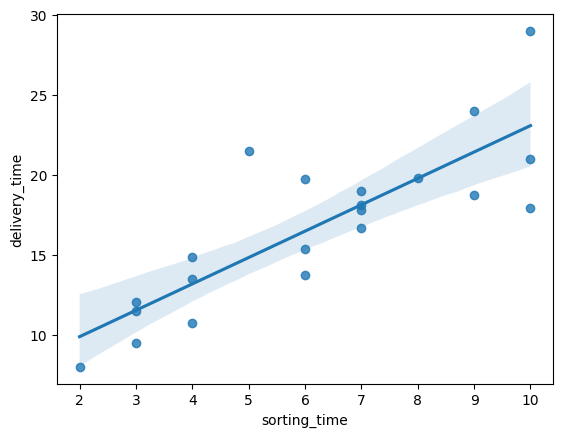

In [ ]:
import seaborn as sns
sns.regplot(x=dataset['sorting_time'],y=dataset['delivery_time'])

In [ ]:
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [ ]:
model.tvalues , model.pvalues

(Intercept       3.823349
 sorting_time    6.387447
 dtype: float64,
 Intercept       0.001147
 sorting_time    0.000004
 dtype: float64)

In [ ]:
# R squared values
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [ ]:
# Manual prediction for say sorting time 5
delivery_time = (6.582734) + (1.649020)*(5)
delivery_time

14.827834

In [ ]:
# Predict for 5 and 8 daily circulation
newdata=pd.Series([5,8])
newdata

0    5
1    8
dtype: int64

In [ ]:
data_pred=pd.DataFrame(newdata,columns=['sorting_time'])
data_pred

,sorting_time
0,5
1,8


In [ ]:
model.predict(data_pred)

0    14.827833
1    19.774893
dtype: float64

# Q) Salary_hike

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

In [ ]:
dataset1=pd.read_csv('/content/Salary_Data.csv')
dataset1

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [ ]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


<ipython-input-31-e4fd60ebb7d1>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset1['YearsExperience'])


<Axes: xlabel='YearsExperience', ylabel='Density'>

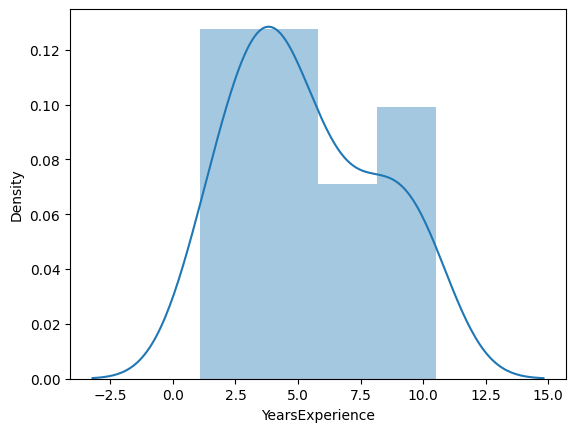

In [ ]:
sns.distplot(dataset1['YearsExperience'])

<ipython-input-33-5afbe5bf55ea>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset1['Salary'])


<Axes: xlabel='Salary', ylabel='Density'>

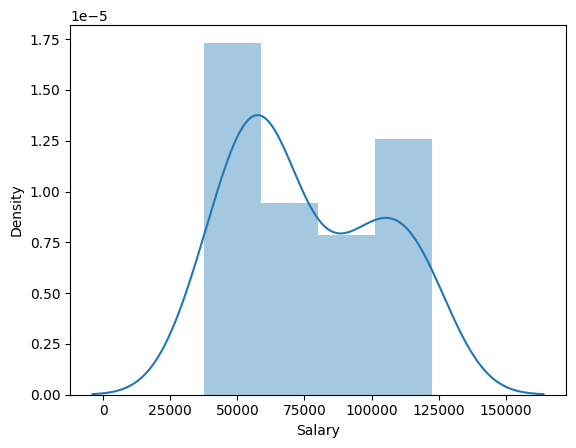

In [ ]:
sns.distplot(dataset1['Salary'])

Independent and Dependent Variables

In [ ]:
x=dataset1.iloc[:, 0].values
y=dataset1.iloc[:, 1].values

In [ ]:
x

array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.2,  3.7,  3.9,
        4. ,  4. ,  4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,
        7.9,  8.2,  8.7,  9. ,  9.5,  9.6, 10.3, 10.5])

In [ ]:
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [ ]:
x_train

array([ 9.6,  4. ,  5.3,  7.9,  2.9,  5.1,  3.2,  4.5,  8.2,  6.8,  1.3,
       10.5,  3. ,  2.2,  5.9,  6. ,  3.7,  3.2,  9. ,  2. ,  1.1,  7.1,
        4.9,  4. ])

In [ ]:
y_train

array([112635.,  55794.,  83088., 101302.,  56642.,  66029.,  64445.,
        61111., 113812.,  91738.,  46205., 121872.,  60150.,  39891.,
        81363.,  93940.,  57189.,  54445., 105582.,  43525.,  39343.,
        98273.,  67938.,  56957.])

In [ ]:
x_test

array([ 1.5, 10.3,  4.1,  3.9,  9.5,  8.7])

In [ ]:
y_test

array([ 37731., 122391.,  57081.,  63218., 116969., 109431.])

MACHINE LEARNING ALGORITHM

In [ ]:
dataset1.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [ ]:
model=smf.ols("Salary~YearsExperience",data=dataset1).fit()

VISULISATION

<Axes: xlabel='YearsExperience', ylabel='Salary'>

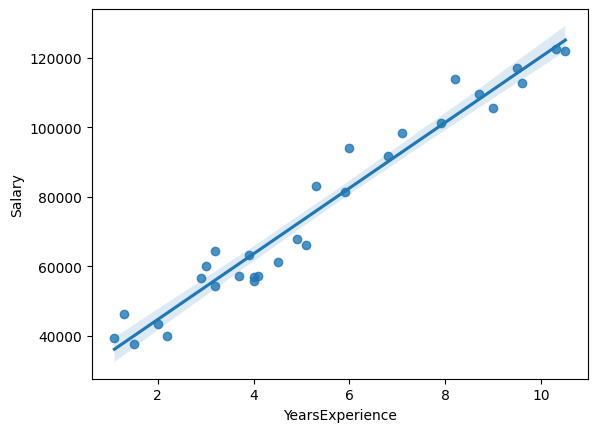

In [ ]:
sns.regplot(x=dataset1['YearsExperience'],y=dataset1['Salary'])

In [ ]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [ ]:
model.tvalues, model.pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64,
 Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

In [ ]:
model.rsquared , model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

In [ ]:
# Manual prediction for say 3 Years Experience
Salary = (25792.200199) + (9449.962321)*(3)
Salary

54142.087162

In [ ]:
# Automatic Prediction for say 3 & 5 Years Experience
new_data=pd.Series([3,5])
new_data

0    3
1    5
dtype: int64

In [ ]:
data_pred=pd.DataFrame(new_data,columns=['YearsExperience'])
data_pred

,YearsExperience
0,3
1,5


In [ ]:
model.predict(data_pred)

0    54142.087163
1    73042.011806
dtype: float64